In [2]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation

In [3]:
plt.rc('font', family = 'malgun gothic')
plt.style.use('fivethirtyeight')

In [4]:
def binom_graph(n,prob,k):
    
    x = np.arange(0,n+1)
    
    scalar = np.linspace(0,n+1,100)
    
    graph = [binom.pmf(_,n,prob) for _ in scalar]
    probs = [binom.pmf(_,n,prob) for _ in x]
    
    colors = ['blue' if _ == k else 'gray' for _ in x]

    fig,ax = plt.subplots(figsize = (10,5))
    
    ax.plot(scalar,graph, alpha = 0.3)
    ax.scatter(x,probs,c = colors)
    ax.set_yticklabels([str(int(_ * 100)) + '%' for _ in ax.get_yticks()])
    
    ax.plot([k,k],[0,probs[k]], c = 'k', ls = '--', lw = 0.5)
    ax.plot([-0.1,k],[probs[k],probs[k]], c = 'k', ls = '--', lw = 0.5)
    
    
    
    under_prob = binom.cdf(k,n,prob)
    over_prob = 1 - under_prob
    
    x1 = np.linspace(0,k,100)
    y1 = [binom.pmf(_,n,prob) for _ in x1]
    
    x2 = np.linspace(k,n+1,100)
    y2 = [binom.pmf(_,n,prob) for _ in x2]
    
    ax.fill_between(x1,y1, alpha = 0.3, color = 'gray',
                    label = f'{int(under_prob * 100)}%')
    ax.fill_between(x2,y2, alpha = 0.3, color = 'pink',
                    label = f'{int(over_prob * 100)}%')
    
    k_coord = (x[k],probs[k])
    
    ax.text(k_coord[0],k_coord[1]+0.01,f'{int(probs[k] * 100)}%')
    ax.legend(loc = 'upper right')
    ax.set_xlim([-0.1,n])
    
    if n < 31:
        ax.set_xticks(x)
    
    return fig,ax

C:\Users\whileduck\AppData\Local\Temp\ipykernel_18032\2207306195.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(_ * 100)) + '%' for _ in ax.get_yticks()])


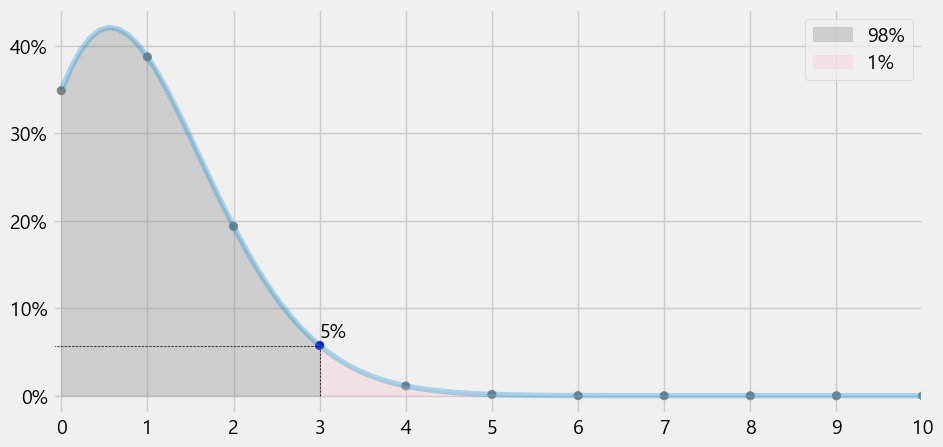

In [5]:
_ = binom_graph(10,1/10,3)

In [6]:
from IPython.display import HTML

C:\Users\whileduck\AppData\Local\Temp\ipykernel_18032\3612779863.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{int(_ * 100)}%' for _ in ax.get_yticks()])


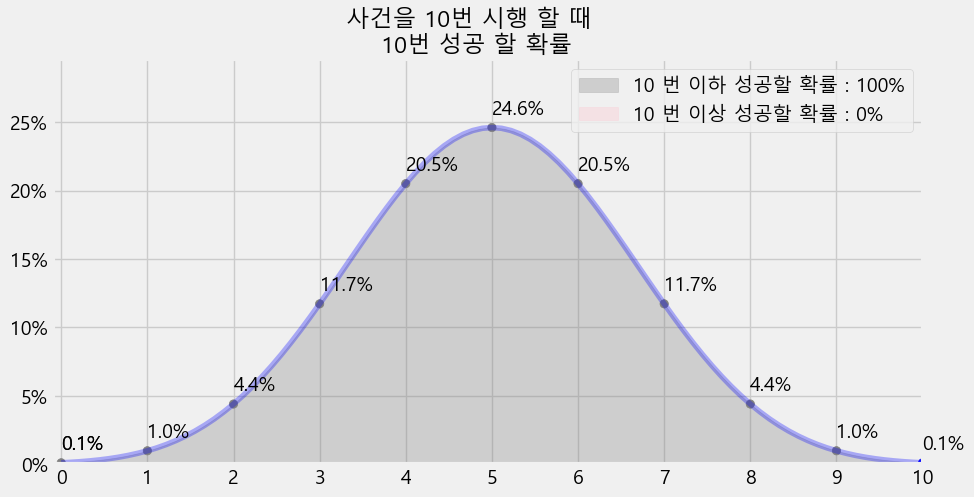

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

def update(k):
    
    ax.collections.clear()
    ax.patches.clear()
    ax.lines.clear()

    x1 = np.linspace(0, k, 100)
    y1 = [binom.pmf(_, n, prob) for _ in x1]

    x2 = np.linspace(k, n + 1, 100)
    y2 = [binom.pmf(_, n, prob) for _ in x2]
    
    under_prob = binom.cdf(k,n,prob)
    over_prob = 1 - under_prob

    ax.fill_between(x1, y1, alpha=0.3, color='gray', label=f'{k} 번 이하 성공할 확률 : {int(under_prob * 100)}%')
    ax.fill_between(x2, y2, alpha=0.3, color='pink', label=f'{k} 번 이상 성공할 확률 : {int(over_prob * 100)}%')
    ax.plot(scalar, graph, alpha=0.3, c = 'blue')
    
    colors = ['blue' if _ == k else 'gray' for _ in x]
    
    ax.scatter(x, probs, c=colors)

    ax.plot([k, k], [0, probs[k]], c='k', ls='--', lw=0.5)
    ax.plot([-0.1, k], [probs[k], probs[k]], c='k', ls='--', lw=0.5)

    k_coord = (x[k], probs[k])
    ax.text(k_coord[0], k_coord[1] + 0.01, f'{round(probs[k] * 100,1)}%')
    ax.legend(loc='upper right')

    ax.set_xlim([-0.1, n])
    ax.set_ylim([0, max(graph) + 0.05])
    ax.set_yticklabels([f'{int(_ * 100)}%' for _ in ax.get_yticks()])
    
    fig.suptitle(f'사건을 {n}번 시행 할 때 \n {k}번 성공 할 확률')

    if n < 31:
        ax.set_xticks(x)

    return ax

n = 10
prob = 0.5
x = np.arange(0, n + 1)
scalar = np.linspace(0, n + 1, 100)
graph = [binom.pmf(_, n, prob) for _ in scalar]
probs = [binom.pmf(_, n, prob) for _ in x]
colors = ['blue' if _ == 5 else 'gray' for _ in x]
under_prob = binom.cdf(5, n, prob)
over_prob = 1 - under_prob

fig, ax = plt.subplots(figsize=(10, 5))
anim = FuncAnimation(fig, update, frames=n+1, interval=1000, repeat=False)

HTML(anim.to_jshtml())


In [11]:
anim.save('이항 분포.gif', writer='imagemagick')

MovieWriter imagemagick unavailable; using Pillow instead.
C:\Users\whileduck\AppData\Local\Temp\ipykernel_18032\3612779863.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{int(_ * 100)}%' for _ in ax.get_yticks()])


In [41]:
def goosegoose_distribution():
    
    fig,ax = plt.subplots(figsize  =(10,5))

    n = int(input('판 수를 입력해주세요 :'))
    player = int(input('플레이어 수를 입력해주세요 :'))
    
    if player < 10:
        prob = 1/player
    if player >= 10:
        prob = 2/player
    
    def update(k):
    
        ax.collections.clear()
        ax.patches.clear()
        ax.lines.clear()

        x1 = np.linspace(0, k, 100)
        y1 = [binom.pmf(_, n, prob) for _ in x1]

        x2 = np.linspace(k, n + 1, 100)
        y2 = [binom.pmf(_, n, prob) for _ in x2]
        
        under_prob = binom.cdf(k,n,prob)
        over_prob = 1 - under_prob

        ax.fill_between(x1, y1, alpha=0.3, color='gray', label=f'{k} 번 이하 오리에 걸릴 확률 : {int(under_prob * 100)}%')
        ax.fill_between(x2, y2, alpha=0.3, color='pink', label=f'{k} 번 이상 오리에 걸릴 확률 : {int(over_prob * 100)}%')
        ax.plot(scalar, graph, alpha=0.3, c = 'blue')
        
        colors = ['blue' if _ == k else 'gray' for _ in x]
        
        ax.scatter(x, probs, c=colors)

        ax.plot([k, k], [0, probs[k]], c='k', ls='--', lw=0.5)
        ax.plot([-0.1, k], [probs[k], probs[k]], c='k', ls='--', lw=0.5)

        k_coord = (x[k], probs[k])
        ax.text(k_coord[0], k_coord[1] + 0.01, f'{round(probs[k] * 100,1)}%')
        ax.legend(loc='upper right')

        ax.set_xlim([-0.1, n])
        ax.set_ylim([0, max(graph) + 0.05])
        ax.set_yticklabels([f'{int(_ * 100)}%' for _ in ax.get_yticks()])
        
        fig.suptitle(f'게임을 {n}번 시행 할 때 \n {k}번 오리가 걸릴 확률')

        if n < 31:
            ax.set_xticks(x)

        return ax
    
    x = np.arange(0, n + 1)
    scalar = np.linspace(0, n + 1, 100)
    graph = [binom.pmf(_, n, prob) for _ in scalar]
    probs = [binom.pmf(_, n, prob) for _ in x]
    colors = ['blue' if _ == 5 else 'gray' for _ in x]
    under_prob = binom.cdf(5, n, prob)
    over_prob = 1 - under_prob

    fig, ax = plt.subplots(figsize=(10, 5))
    anim = FuncAnimation(fig, update, frames = n+1, interval = 500, repeat = True)

    return HTML(anim.to_jshtml())
    

C:\Users\whileduck\AppData\Local\Temp\ipykernel_18032\4122462575.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{int(_ * 100)}%' for _ in ax.get_yticks()])


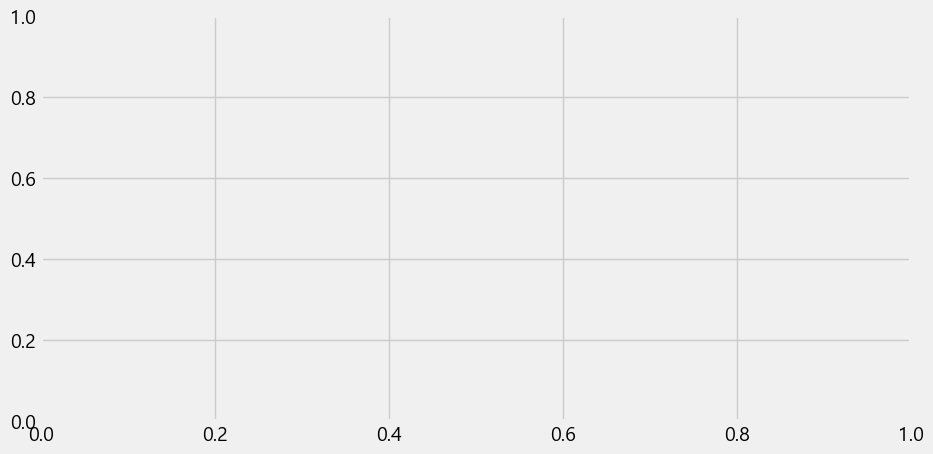

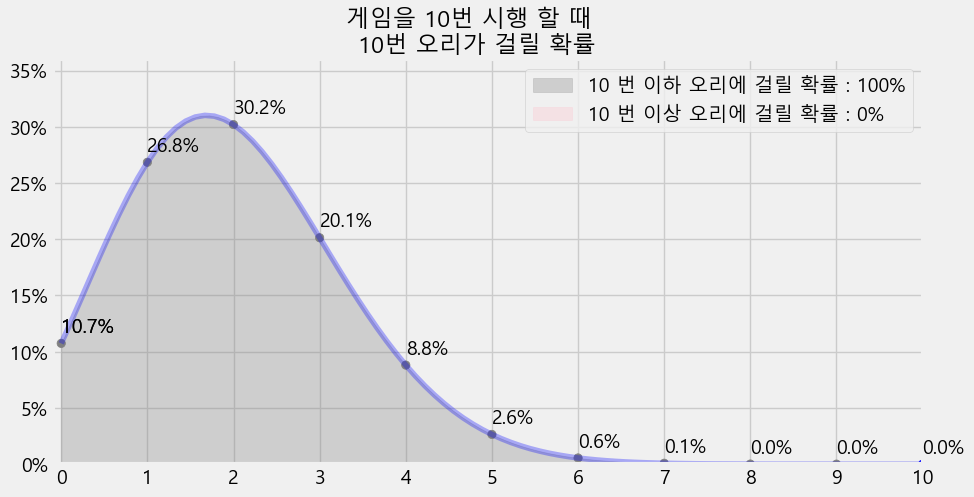

In [42]:
goosegoose_distribution()